# Marked Tutorial 2

Task 1: Design a fuzzy interface system such that average waiting times for cars on main and side street are as close as possible.


Here, we consider a simple intersection which is made of two streets, Main and Side, and no turning lanes. By default, the traffic lights are green for the Main street and red for the Side street. When there is some traffic on the Side, the FIS is activated. Street sensors provide information on the number of cars on the Main street (incoming traffic) and the number of cars on the Side street (waiting traffic). Based on this information, the FIS needs to make decisions on:

- waiting duration: the duration before the traffic lights on the Side street switch to green; and
- green duration: the duration for which the Side traffic lights stay green.

  Both durations are measured in seconds.


## Task

Design a fuzzy interface system such that average waiting times for cars on main and side street are as close as possible

## Assumption / preconditions

- Irrespective of the waiting traffic / incoming traffic on either roads, the system will be designed such that the waiting duration and open durations, is close enough
- the system will be designed in such a way that the open duration and closed duration is determined by the side with least traffic


# A. Basic FIS implementation


In [84]:
# pip install -U scikit-fuzzy

## 1- Inputs & outputs


In [85]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


waitingTraffic = ctrl.Antecedent(np.arange(1, 100, 1), "waiting")
incomingTraffic = ctrl.Antecedent(np.arange(0, 100, 1), "incoming")

waitingDuration = ctrl.Consequent(np.arange(0, 120, 1), "wait duration")
openDuration = ctrl.Consequent(np.arange(0, 120, 1), "open duration")

## 2- Fuzzification & membership functions


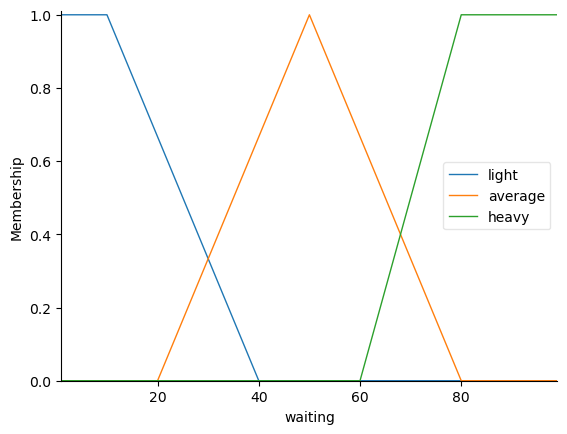

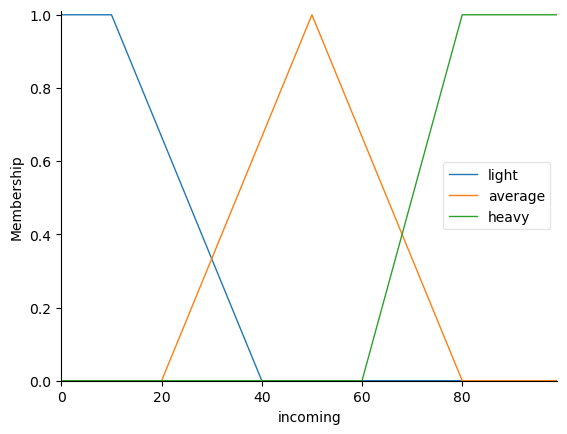

In [86]:
# fuzzySetNamesTraffic = ["light", "average", "heavy"]
# waitingTraffic.automf(names=fuzzySetNamesTraffic)
# incomingTraffic.automf(names=fuzzySetNamesTraffic)
# waitingTraffic.view()
# incomingTraffic.view()

# fuzzySetNamesDuration = ["short", "medium", "long"]
# waitingDuration.automf(names=fuzzySetNamesDuration)
# openDuration.automf(names=fuzzySetNamesDuration)
# waitingDuration.view()
# openDuration.view()

# lets add trapezoidal membership functions
waitingTraffic["light"] = fuzz.trapmf(waitingTraffic.universe, [1, 1, 10, 40])
waitingTraffic["average"] = fuzz.trimf(waitingTraffic.universe, [20, 50, 80])
waitingTraffic["heavy"] = fuzz.trapmf(waitingTraffic.universe, [60, 80, 100, 100])
incomingTraffic["light"] = fuzz.trapmf(incomingTraffic.universe, [0, 0, 10, 40])
incomingTraffic["average"] = fuzz.trimf(incomingTraffic.universe, [20, 50, 80])
incomingTraffic["heavy"] = fuzz.trapmf(incomingTraffic.universe, [60, 80, 100, 100])
waitingTraffic.view()
incomingTraffic.view()

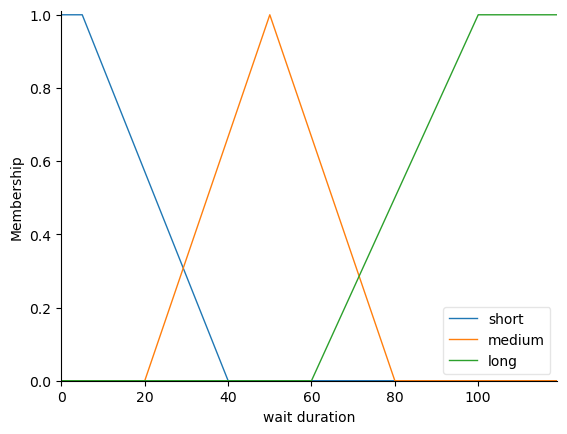

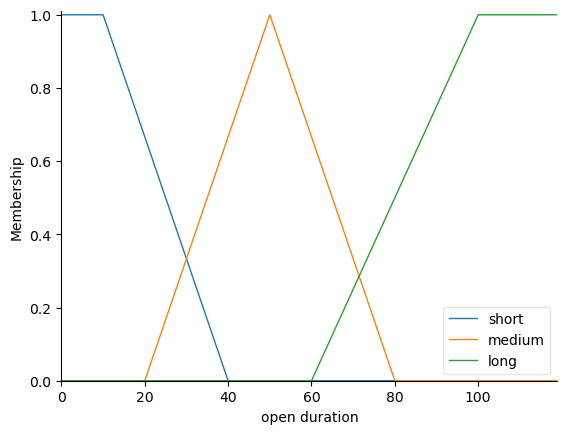

In [87]:
waitingDuration["short"] = fuzz.trapmf(waitingDuration.universe, [0, 0, 5, 40])
waitingDuration["medium"] = fuzz.trimf(waitingDuration.universe, [20, 50, 80])
waitingDuration["long"] = fuzz.trapmf(waitingDuration.universe, [60, 100, 120, 120])
openDuration["short"] = fuzz.trapmf(openDuration.universe, [0, 0, 10, 40])
openDuration["medium"] = fuzz.trimf(openDuration.universe, [20, 50, 80])
openDuration["long"] = fuzz.trapmf(openDuration.universe, [60, 100, 120, 120])
waitingDuration.view()
openDuration.view()

## 3- Knowledge base


In [88]:
rule1 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["light"],
    [waitingDuration["short"], openDuration["short"]],
)


rule2 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["average"],
    [waitingDuration["short"], openDuration["medium"]],
)


rule3 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["heavy"],
    [waitingDuration["short"], openDuration["long"]],
)


rule4 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["light"],
    [waitingDuration["medium"], openDuration["short"]],
)


rule5 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["average"],
    [waitingDuration["medium"], openDuration["medium"]],
)


rule6 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["heavy"],
    [waitingDuration["medium"], openDuration["long"]],
)


rule7 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["light"],
    [waitingDuration["long"], openDuration["short"]],
)


rule8 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["average"],
    [waitingDuration["long"], openDuration["medium"]],
)


rule9 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["heavy"],
    [waitingDuration["long"], openDuration["long"]],
)

## 4- Inference Engine


In [89]:
# add any code if needed

## 5- Defuzzification


In [90]:
waitingDuration.defuzzify_method = "centroid"
openDuration.defuzzify_method = "centroid"

# B. Model Usage


Testing on a single test case and visualising the results.


14.0
98.0


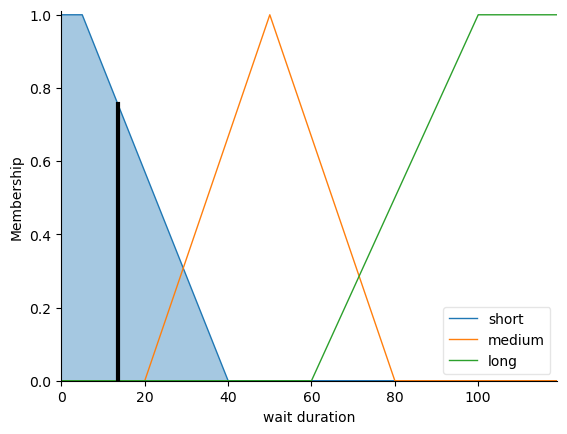

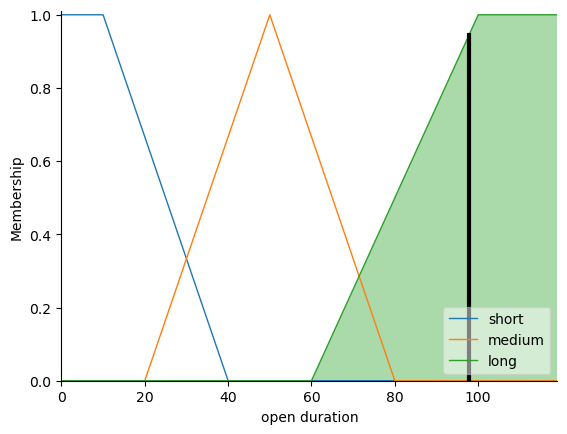

In [91]:
fis = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
)


fis_simulator = ctrl.ControlSystemSimulation(fis)


# Now, test yur FIS with some inputs & check the outputs


fis_simulator.input["incoming"] = 2


fis_simulator.input["waiting"] = 80


fis_simulator.compute()


print(round(fis_simulator.output["wait duration"], 0))


waitingDuration.view(sim=fis_simulator)


print(round(fis_simulator.output["open duration"], 0))


openDuration.view(sim=fis_simulator)

Testing on multiple test cases


In [101]:
incoming_test = [
    0,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    95,
    100,
    105,
    110,
    115,
    120,
]
waiting_test = [
    0,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    95,
    100,
    105,
    110,
    115,
    120,
]


# create a pandas dataframe to store the results
import pandas as pd

results = pd.DataFrame(
    columns=["waiting", "incoming", "wait duration", "open duration"]
)


# loop through the test data and store the results


for i in range(incoming_test.__len__()):
    fis_simulator.input["incoming"] = incoming_test[i]
    fis_simulator.input["waiting"] = waiting_test[len(waiting_test) - i - 1]

    fis_simulator.compute()
    print(
        " waiting: "
        + str(waiting_test[len(waiting_test) - i - 1])
        + ", incoming: "
        + str(incoming_test[i])
        + ", wait duration: "
        + str(round(fis_simulator.output["wait duration"], 0))
        + ", open duration: "
        + str(round(fis_simulator.output["open duration"], 0))
    )
    results = results.append(
        {
            "waiting": waiting_test[len(waiting_test) - i - 1],
            "incoming": incoming_test[i],
            "wait duration": round(fis_simulator.output["wait duration"], 0),
            "open duration": round(fis_simulator.output["open duration"], 0),
        },
        ignore_index=True,
    )

# plot the results
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(results["wait duration"], label="wait duration")
plt.plot(results["open duration"], label="open duration")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(results["waiting"], label="waiting")
plt.plot(results["incoming"], label="incoming")
plt.legend()
plt.show()

 waiting: 120, incoming: 0, wait duration: 14.0, open duration: 98.0


AttributeError: 'DataFrame' object has no attribute 'append'

 waiting: 120, incoming: 0, wait duration: 14.0, open duration: 98.0
 waiting: 115, incoming: 15, wait duration: 14.0, open duration: 97.0
 waiting: 110, incoming: 20, wait duration: 15.0, open duration: 96.0
 waiting: 105, incoming: 25, wait duration: 28.0, open duration: 94.0
 waiting: 100, incoming: 30, wait duration: 38.0, open duration: 93.0
 waiting: 95, incoming: 35, wait duration: 44.0, open duration: 94.0
 waiting: 90, incoming: 40, wait duration: 50.0, open duration: 96.0
 waiting: 85, incoming: 45, wait duration: 50.0, open duration: 97.0
 waiting: 80, incoming: 50, wait duration: 50.0, open duration: 98.0
 waiting: 75, incoming: 55, wait duration: 50.0, open duration: 87.0
 waiting: 70, incoming: 60, wait duration: 50.0, open duration: 77.0
 waiting: 65, incoming: 65, wait duration: 65.0, open duration: 65.0
 waiting: 60, incoming: 70, wait duration: 77.0, open duration: 50.0
 waiting: 55, incoming: 75, wait duration: 87.0, open duration: 50.0
 waiting: 50, incoming: 80, wa

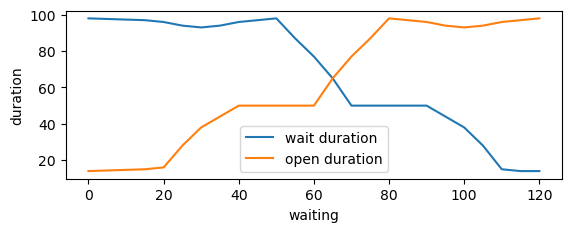

In [107]:
# create a pandas dataframe to store the results
import pandas as pd
import matplotlib.pyplot as plt

results_list = []

# loop through the test data and store the results
for i in range(len(incoming_test)):
    fis_simulator.input["incoming"] = incoming_test[i]
    fis_simulator.input["waiting"] = waiting_test[len(waiting_test) - i - 1]

    fis_simulator.compute()
    print(
        " waiting: "
        + str(waiting_test[len(waiting_test) - i - 1])
        + ", incoming: "
        + str(incoming_test[i])
        + ", wait duration: "
        + str(round(fis_simulator.output["wait duration"], 0))
        + ", open duration: "
        + str(round(fis_simulator.output["open duration"], 0))
    )
    results_list.append(
        {
            "waiting": waiting_test[len(waiting_test) - i - 1],
            "incoming": incoming_test[i],
            "wait duration": round(fis_simulator.output["wait duration"], 0),
            "open duration": round(fis_simulator.output["open duration"], 0),
        }
    )

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# plot waiting vs wait duration and open duration with waiting on x axis and wait duration and open duration on y axis
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(results["waiting"], results["wait duration"], label="wait duration")
plt.plot(results["waiting"], results["open duration"], label="open duration")
# add labels and legend
plt.xlabel("waiting")
plt.ylabel("duration")
plt.legend()
plt.show()

In [93]:
# python function to generate all possible combination of the input values
# and test the FIS with all possible combinations
# and print the output values
# and plot the output values
# and save the plot as an image
# and return the output values as a list of tuples
# and return the output values as a list of tuples


# incoming_test = [0, 15, 20, 40, 12, 8, 59, 50]

# def TestFIS()

Mean waiting time - main street 252.874015569488
Mean waiting time - side street 51.2367247311828


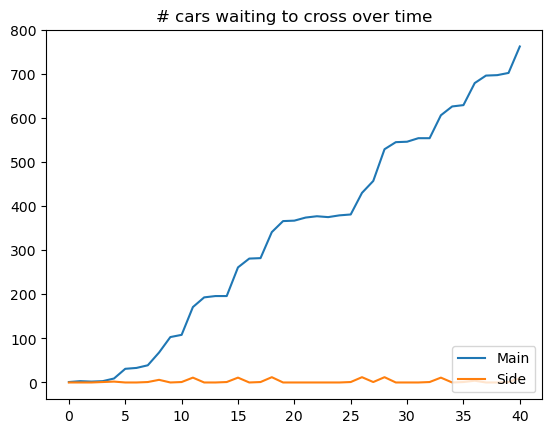

In [100]:
import trafficSimulator

num_cars_on_main, num_cars_on_side, wait_times_main, wait_times_side = (
    trafficSimulator.simulate(fis_simulator, verbose=False)
)

print("Mean waiting time - main street", np.mean(wait_times_main))
print("Mean waiting time - side street", np.mean(wait_times_side))
plt.plot(num_cars_on_main)
plt.plot(num_cars_on_side)
plt.legend(["Main", "Side"], loc="lower right")
plt.title("# cars waiting to cross over time")
plt.show()

In [95]:
import pandas as pd

# check the shape of all the lists
# print(
#     len(num_cars_on_main),
#     len(num_cars_on_side),
#     len(wait_times_main),
#     len(wait_times_side),
# )

# df = pd.DataFrame(
#     {
#         "num_cars_on_main": num_cars_on_main,
#         "num_cars_on_side": num_cars_on_side,
#         "wait_times_main": wait_times_main,
#         "wait_times_side": wait_times_side,
#     }
# )

# df.head()